In [43]:
from coral_imports import *
from coral_plotting import *
from coral_run_project import *
import matplotlib.ticker as tck

# Read in Pipeline and Libraries

In [4]:
base = os.path.join(os.getcwd(), "analysis", "configs", "base.yaml")
base_float = os.path.join(os.getcwd(), "analysis", "configs", "base_float.yaml")
library = os.path.join(os.getcwd(), "analysis", "library")
weather_fp = os.path.join(os.getcwd(), "analysis", "library", "weather", "vineyard_wind_repr_with_whales.csv")

weather = pd.read_csv(weather_fp, parse_dates=["datetime"])\
            .set_index("datetime")

# Create DFs based on CORAL runs

In [5]:
# set up yaml reading
def tuple_constructor(loader, node):
    # Load the sequence of values from the YAML node
    values = loader.construct_sequence(node)
    # Return a tuple constructed from the sequence
    return tuple(values)

# Register the constructor with PyYAML
yaml.SafeLoader.add_constructor('tag:yaml.org,2002:python/tuple', 
tuple_constructor)

In [12]:
scenarios = ['core_scenario']
# print(scenarios)

dfs = []
managers = []
all_alloc = []
all_future = []
cols = ['best_path_forward_south_ne', 'high_deployment_south_ne', 'low_deployment_south_ne', 'best_path_forward_north_ne', 'high_deployment_north_ne', 'low_deployment_north_ne']

yrs = np.arange(2023,2043,1)
installed_cap = pd.DataFrame(columns=cols, data = np.zeros((len(yrs), len(cols))), index = yrs)

for s in scenarios:
    with open('analysis/scenarios/%s.yaml' % s) as f:
        scenario = yaml.load(f.read(), Loader=yaml.SafeLoader)
    # print(scenario)
    p = os.path.join(os.getcwd(), "analysis", "pipelines", "%s.csv" % scenario['pipeline'])
    pipeline = Pipeline(p, base, base_float, enforce_feeders=True)

    description = scenario['description']
    allocations = scenario['allocations']
    future_resources = scenario['future_resources']

    manager, df = run_manager(pipeline, allocations, library, weather, future_resources)
    managers.append(manager)
    dfs.append(df)
    all_alloc.append(allocations)
    all_future.append(future_resources)

    for region in ['south_ne', 'north_ne']:
        df_port = df.drop(columns=['index'])
        if region == 'south_ne':
            ports = ['new_bedford','new_london']
        else:
            ports = ['salem','searsport']
        
        df_region = df_port[df_port['port'].isin(ports)].reset_index(drop=True).reset_index()
        # display(df_region)
        df_region['finished'] = df_region['Date Finished'].dt.year
        df_finished = df_region.groupby(['finished']).capacity.sum().reset_index()
        # display(df_finished)
        mapping = dict(df_finished[['finished','capacity']].values)
        installed_cap['%s_%s' % (s,region)] = installed_cap.index.map(mapping)
# display(installed_cap)
# installed_cap.to_csv('analysis/results/installed_cap_%s.csv' % region)


,best_path_forward_south_ne,high_deployment_south_ne,low_deployment_south_ne,best_path_forward_north_ne,high_deployment_north_ne,low_deployment_north_ne,core_scenario_south_ne,core_scenario_north_ne
2023,0.0,0.0,0.0,0.0,0.0,0.0,882.0,NaN
2024,0.0,0.0,0.0,0.0,0.0,0.0,754.0,NaN
2025,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2026,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2027,0.0,0.0,0.0,0.0,0.0,0.0,462.0,NaN
2028,0.0,0.0,0.0,0.0,0.0,0.0,1264.0,144.0
2029,0.0,0.0,0.0,0.0,0.0,0.0,802.0,400.0
2030,0.0,0.0,0.0,0.0,0.0,0.0,400.0,400.0
2031,0.0,0.0,0.0,0.0,0.0,0.0,960.0,616.0
2032,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1090.0


In [25]:
display(all_future)

[[['wtiv',
   'example_wtiv',
   [datetime.date(2025, 1, 1),
    datetime.date(2025, 1, 1),
    datetime.date(2030, 1, 1)]],
  ['feeder',
   'example_feeder',
   [datetime.date(2025, 1, 1),
    datetime.date(2025, 1, 1),
    datetime.date(2025, 1, 1),
    datetime.date(2025, 1, 1),
    datetime.date(2030, 1, 1),
    datetime.date(2030, 1, 1)]],
  ['wtiv',
   'example_heavy_lift_vessel',
   [datetime.date(2028, 1, 1), datetime.date(2030, 1, 1)]],
  ['feeder',
   'example_heavy_feeder_1kit',
   [datetime.date(2028, 1, 1),
    datetime.date(2028, 1, 1),
    datetime.date(2030, 1, 1),
    datetime.date(2030, 1, 1)]],
  ['ahts_vessel',
   'example_ahts_vessel',
   [datetime.date(2025, 1, 1),
    datetime.date(2030, 1, 1),
    datetime.date(2035, 1, 1),
    datetime.date(2040, 1, 1)]],
  ['port', 'new_bedford', [datetime.date(2035, 1, 1)]],
  ['port', 'sbmt', [datetime.date(2027, 1, 1), datetime.date(2035, 1, 1)]],
  ['port',
   'njwp',
   [datetime.date(2025, 1, 1),
    datetime.date(2029, 

In [26]:
# installed_cap.to_csv('analysis/results/installed_cap.csv')

# Plot Installed Capacity

In [6]:
def installed_cap(dfs, desc):

    cum_desc = []
    i = 0
    for d in desc:
        cum_desc.append("%s cumulative" % d)
        i += 1
    yrs = np.arange(2023,2043,1)
    df_cap = pd.DataFrame(columns=desc, data = np.zeros((len(yrs), len(desc))), index = yrs)
    df_cum = pd.DataFrame(columns=cum_desc, data = np.zeros((len(yrs), len(desc))), index = yrs)

    dfs[0]['cod'] = dfs[0]['estimated_cod'].dt.year
    df_cod = dfs[0].groupby(['cod']).capacity.sum().reset_index()
    df_cod['sum'] = df_cod['capacity'].cumsum(axis=0) / 1000

    fig = plt.figure(figsize=(8, 10), dpi=200)
    ax = fig.add_subplot(1,1,1)

    # df_cod.plot(kind='line', x='cod', y='sum', color='k', ax=ax, label='Unconstrained Resources')
    i=0
    width = 0.25

    for df in dfs:
        df['finished'] = df['Date Finished'].dt.year
        df_finished = df.groupby(['finished']).capacity.sum().reset_index()
        df_finished['capacity'] = df_finished['capacity'] / 1000
        df_finished['sum'] = df_finished['capacity'].cumsum(axis=0)

        cap_mapping = dict(df_finished[['finished', 'capacity']].values)
        df_cap[desc[i]] = df_cap.index.map(cap_mapping).fillna(0)

        df_cum[cum_desc[i]] = df_cap[desc[i]].cumsum(axis=0)
        i += 1

    df = pd.concat([df_cap, df_cum], axis=1)
    # df['year'] = yrs
    # display(df)
    df[cum_desc].plot(linestyle = '-', ax=ax, use_index=False)
    df[desc].plot(kind='bar', ax=ax)
    # df_cap.plot.bar(rot=0)
    
    ax.set_xlabel("")
    ax.set_ylabel("Capacity (GW)")
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.legend()

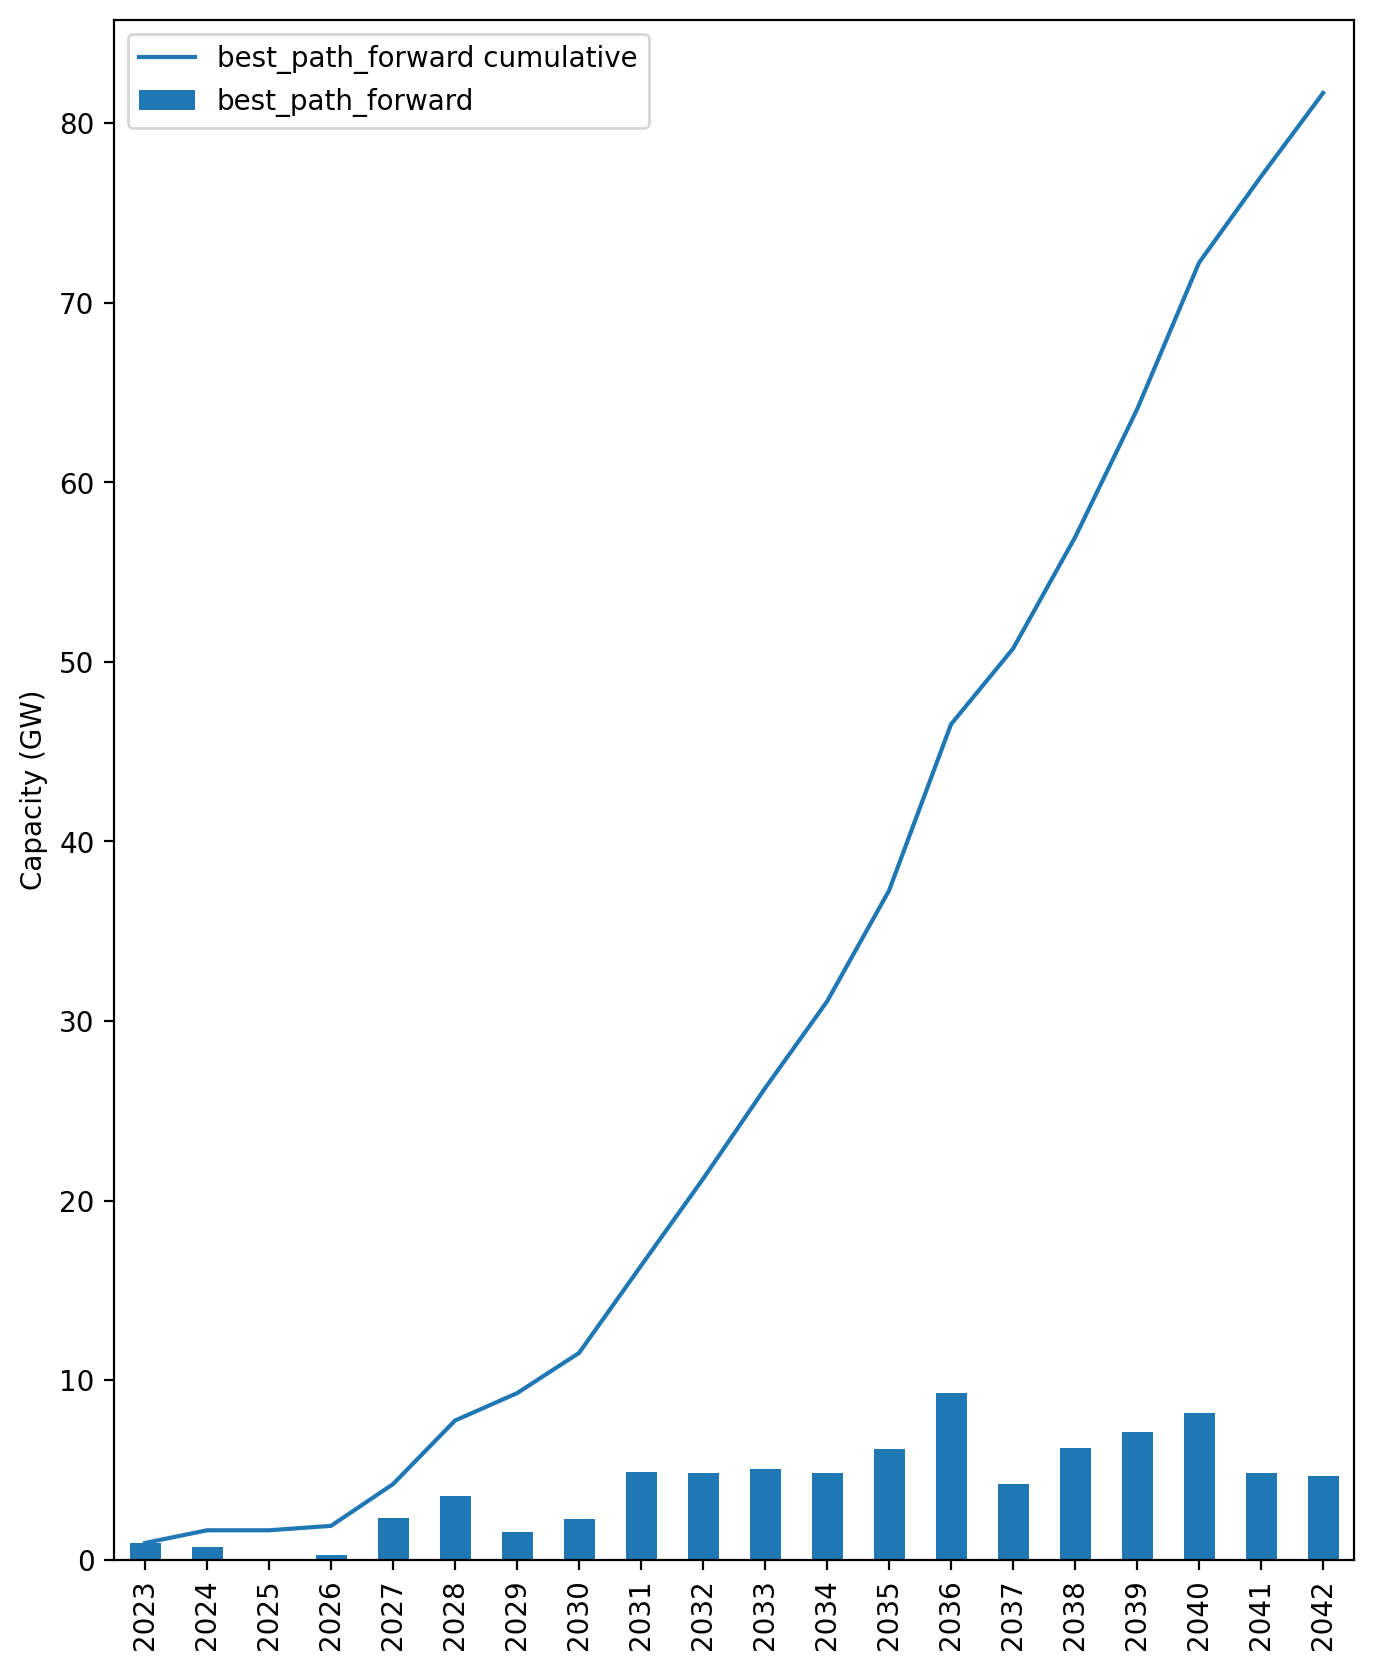

In [7]:
installed_cap(dfs, scenarios)

<AxesSubplot:xlabel='month'>

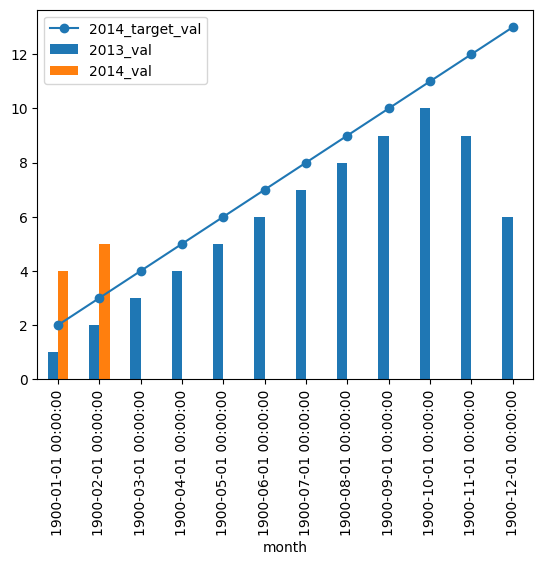

In [8]:
# sample
df = pd.DataFrame({
    'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
    '2013_val': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 6], 
    '2014_val': [4.0, 5.0, *[float('nan')]*10], 
    '2014_target_val': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]})

# month data to datetime
df['month'] = pd.to_datetime(df['month'], format='%b')

fig, ax = plt.subplots(1, facecolor='white')
df.plot(y='2014_target_val', linestyle='-', marker='o', ax=ax)
df.plot(x='month', y=['2013_val', '2014_val'], kind='bar', ax=ax)


# Investment Plots

In [36]:
low_vessel_costs = {
    "example_wtiv": 550,
    "example_heavy_lift_vessel": 500,
    "example_heavy_feeder": 250,
    "example_ahts_vessel": 75
}

avg_vessel_costs = {
    "example_wtiv": 615,
    "example_heavy_lift_vessel": 625,
    "example_heavy_feeder_1kit": 250,
    "example_feeder": 250,
    "example_ahts_vessel": 80
}

high_vessel_costs = {
    "wtiv": 680,
    "hlv": 750,
    "feeder": 300,
    "ahts_vessel": 85
}

In [29]:
alloc = all_alloc[0]
print(alloc)
# display(alloc)
vessel_types = ['example_wtiv','example_heavy_lift_vessel','example_feeder', 'example_heavy_feeder_1kit','example_ahts_vessel']
init_alloc = [alloc['wtiv'][1][1], alloc['wtiv'][0][1], alloc['feeder'][1][1], alloc['feeder'][0][1], alloc['ahts_vessel'][1]]

yrs = np.arange(2023,2043)
dates = pd.to_datetime(yrs, format='%Y')
vessel_investment = pd.DataFrame(columns=vessel_types, data = np.zeros((len(yrs), len(vessel_types))), index = dates)
vessel_investment.iloc[0] = init_alloc
display(vessel_investment)

{'ahts_vessel': ('example_ahts_vessel', 100), 'feeder': [('example_heavy_feeder_1kit', 100), ('example_feeder', 100)], 'towing_vessel': ('example_towing_vessel', 100), 'wtiv': [('example_heavy_lift_vessel', 100), ('example_wtiv', 100)], 'port': [('new_london', 1), ('new_bedford', 1), ('sbmt', 0), ('njwp', 0), ('searsport', 0), ('tradepoint', 0), ('portsmouth', 0), ('salem', 0), ('arthur_kill', 1)]}


,example_wtiv,example_heavy_lift_vessel,example_feeder,example_heavy_feeder_1kit,example_ahts_vessel
2023-01-01,100.0,100.0,100.0,100.0,100.0
2024-01-01,0.0,0.0,0.0,0.0,0.0
2025-01-01,0.0,0.0,0.0,0.0,0.0
2026-01-01,0.0,0.0,0.0,0.0,0.0
2027-01-01,0.0,0.0,0.0,0.0,0.0
2028-01-01,0.0,0.0,0.0,0.0,0.0
2029-01-01,0.0,0.0,0.0,0.0,0.0
2030-01-01,0.0,0.0,0.0,0.0,0.0
2031-01-01,0.0,0.0,0.0,0.0,0.0
2032-01-01,0.0,0.0,0.0,0.0,0.0


In [30]:
display(all_future)

[[['wtiv',
   'example_wtiv',
   [datetime.date(2025, 1, 1),
    datetime.date(2025, 1, 1),
    datetime.date(2030, 1, 1)]],
  ['wtiv',
   'example_heavy_lift_vessel',
   [datetime.date(2028, 1, 1), datetime.date(2030, 1, 1)]],
  ['ahts_vessel',
   'example_ahts_vessel',
   [datetime.date(2025, 1, 1),
    datetime.date(2030, 1, 1),
    datetime.date(2035, 1, 1),
    datetime.date(2040, 1, 1)]],
  ['port', 'new_bedford', [datetime.date(2035, 1, 1)]],
  ['port', 'sbmt', [datetime.date(2027, 1, 1), datetime.date(2035, 1, 1)]],
  ['port',
   'njwp',
   [datetime.date(2025, 1, 1),
    datetime.date(2029, 1, 1),
    datetime.date(2035, 1, 1)]],
  ['port',
   'tradepoint',
   [datetime.date(2025, 1, 1), datetime.date(2035, 1, 1)]],
  ['port',
   'portsmouth',
   [datetime.date(2024, 1, 1),
    datetime.date(2024, 1, 1),
    datetime.date(2035, 1, 1)]],
  ['port', 'salem', [datetime.date(2026, 1, 1)]],
  ['port',
   'searsport',
   [datetime.date(2030, 1, 1), datetime.date(2035, 1, 1)]]]]

In [31]:
for vessel in vessel_types:
    for vessel_type in all_future[0]:
        if vessel_type[1] == vessel:
            years = vessel_type[2]
            print(years)
            print(len(years))
            vessel_investment.loc[years,vessel] += len(years)
    # vessel_investment[vessel] = vessel_investment[vessel] * avg_vessel_costs[vessel]

[datetime.date(2025, 1, 1), datetime.date(2025, 1, 1), datetime.date(2030, 1, 1)]
3
[datetime.date(2028, 1, 1), datetime.date(2030, 1, 1)]
2
[datetime.date(2025, 1, 1), datetime.date(2030, 1, 1), datetime.date(2035, 1, 1), datetime.date(2040, 1, 1)]
4


In [32]:
display(vessel_investment)

,example_wtiv,example_heavy_lift_vessel,example_feeder,example_heavy_feeder_1kit,example_ahts_vessel
2023-01-01,100.0,100.0,100.0,100.0,100.0
2024-01-01,0.0,0.0,0.0,0.0,0.0
2025-01-01,3.0,0.0,0.0,0.0,4.0
2026-01-01,0.0,0.0,0.0,0.0,0.0
2027-01-01,0.0,0.0,0.0,0.0,0.0
2028-01-01,0.0,2.0,0.0,0.0,0.0
2029-01-01,0.0,0.0,0.0,0.0,0.0
2030-01-01,3.0,2.0,0.0,0.0,4.0
2031-01-01,0.0,0.0,0.0,0.0,0.0
2032-01-01,0.0,0.0,0.0,0.0,0.0


In [33]:
us_vessels = ['example_feeder', 'example_heavy_feeder_1kit', 'example_ahts_vessel']
foreign_vessels = ['example_wtiv', 'example_heavy_lift_vessel']
vessel_investment.loc[:,'us_total'] = vessel_investment[us_vessels].sum(axis=1)
vessel_investment['us_total'] = vessel_investment['us_total'].cumsum()
vessel_investment.loc[:,'foreign_total'] = vessel_investment[foreign_vessels].sum(axis=1)
vessel_investment['foreign_total'] = vessel_investment['foreign_total'].cumsum()
display(vessel_investment)

,example_wtiv,example_heavy_lift_vessel,example_feeder,example_heavy_feeder_1kit,example_ahts_vessel,us_total,foreign_total
2023-01-01,100.0,100.0,100.0,100.0,100.0,300.0,200.0
2024-01-01,0.0,0.0,0.0,0.0,0.0,300.0,200.0
2025-01-01,3.0,0.0,0.0,0.0,4.0,304.0,203.0
2026-01-01,0.0,0.0,0.0,0.0,0.0,304.0,203.0
2027-01-01,0.0,0.0,0.0,0.0,0.0,304.0,203.0
2028-01-01,0.0,2.0,0.0,0.0,0.0,304.0,205.0
2029-01-01,0.0,0.0,0.0,0.0,0.0,304.0,205.0
2030-01-01,3.0,2.0,0.0,0.0,4.0,308.0,210.0
2031-01-01,0.0,0.0,0.0,0.0,0.0,308.0,210.0
2032-01-01,0.0,0.0,0.0,0.0,0.0,308.0,210.0


<AxesSubplot:>

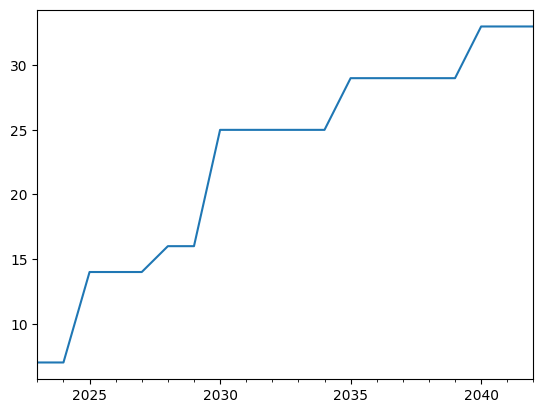

In [15]:
vessel_investment['total'].plot()

## Invesment from func

In [28]:
vessel_types = ['example_wtiv','example_heavy_lift_vessel', 'example_feeder', 'example_heavy_feeder_1kit', 'example_ahts_vessel']
vessel_costs = {
    "example_wtiv": 615,
    "example_heavy_lift_vessel": 625,
    "example_heavy_feeder_1kit": 250,
    "example_feeder": 100,
    "example_ahts_vessel": 80
}
# display(all_future)
display(all_alloc)

[{'ahts_vessel': ('example_ahts_vessel', 2),
  'feeder': [('example_heavy_feeder_1kit', 6), ('example_feeder', 4)],
  'towing_vessel': ('example_towing_vessel', 100),
  'wtiv': [('example_heavy_lift_vessel', 3), ('example_wtiv', 2)],
  'port': [('new_london', 1),
   ('new_bedford', 1),
   ('sbmt', 0),
   ('njwp', 0),
   ('searsport', 0),
   ('tradepoint', 0),
   ('portsmouth', 0),
   ('salem', 0),
   ('arthur_kill', 1)]}]

In [17]:
def investment_plot(allocs, futures, names, vessel_types, vessel_costs):
    yrs = np.arange(2023,2043)
    dates = pd.to_datetime(yrs, format='%Y')
    fig = plt.figure(figsize=(10,4), dpi=200)
    ax = fig.add_subplot(111)
    investments = pd.DataFrame(index=dates, columns=names, data=np.zeros((len(yrs), len(names))))
    for i in range(0,len(names)):
        init_alloc = [allocs[i]['wtiv'][1][1], allocs[i]['wtiv'][0][1], allocs[i]['ahts_vessel'][1]]
        vessel_investment = pd.DataFrame(columns=vessel_types, data = np.zeros((len(yrs), len(vessel_types))), index = dates)
        vessel_investment.iloc[0] = init_alloc

        for vessel in vessel_types:
            for vessel_type in futures[i]:
                if vessel_type[1] == vessel:
                    years = vessel_type[2]
                    vessel_investment.loc[years,vessel] += 1
            vessel_investment[vessel] = vessel_investment[vessel] * vessel_costs[vessel]
        
        vessel_investment.loc[:,'total'] = vessel_investment.sum(axis=1)
        vessel_investment['total'] = vessel_investment['total'].cumsum()

        vessel_investment['total'].plot(label=names[i])
        investments[names[i]] = vessel_investment['total']
    investments['year'] = yrs
    investments.set_index('year', inplace=True)
    display(investments)
    ax.legend()
        

In [46]:
plt.close()
def vessel_investment_plot(allocs, futures, names, vessel_types, vessel_costs):
    yrs = np.arange(2023,2043)
    dates = pd.to_datetime(yrs, format='%Y')
    fig, axes = plt.subplots(2,1, figsize=(10,6), dpi=200, sharex=True)

    us_investments = pd.DataFrame(index=dates, columns=names, data=np.zeros((len(yrs), len(names))))
    total_investments = pd.DataFrame(index=dates, columns=names, data=np.zeros((len(yrs), len(names))))
    foreign_investments = pd.DataFrame(index=dates, columns=names, data=np.zeros((len(yrs), len(names))))
    for i in range(0,len(names)):
        init_alloc = [allocs[i]['wtiv'][1][1], allocs[i]['wtiv'][0][1], allocs[i]['feeder'][1][1], allocs[i]['feeder'][0][1], allocs[i]['ahts_vessel'][1]]
        vessel_investment = pd.DataFrame(columns=vessel_types, data = np.zeros((len(yrs), len(vessel_types))), index = dates)
        vessel_investment.iloc[0] = init_alloc
        # display(vessel_investment)
        for vessel in vessel_types:
            for vessel_type in futures[i]:
                if vessel_type[1] == vessel:
                    years = vessel_type[2]
                    # print(vessel_type[1])
                    # print(years)
                    for year in years:
                        vessel_investment.loc[[year],vessel] += 1
            # vessel_investment[vessel] = vessel_investment[vessel] * vessel_costs[vessel]
        
        us_vessels = ['example_feeder', 'example_heavy_feeder_1kit', 'example_ahts_vessel']
        foreign_vessels = ['example_wtiv', 'example_heavy_lift_vessel']
        vessel_investment.loc[:,'us_total'] = vessel_investment[us_vessels].sum(axis=1)
        vessel_investment['us_total'] = vessel_investment['us_total'].cumsum() # / 1000
        vessel_investment.loc[:,'foreign_total'] = vessel_investment[foreign_vessels].sum(axis=1)
        vessel_investment['foreign_total'] = vessel_investment['foreign_total'].cumsum() # /1000
        vessel_investment.loc[:,'total'] = vessel_investment[vessel_types].sum(axis=1)
        vessel_investment['total'] = vessel_investment['total'].cumsum() # / 1000

        total_investments[names[i]] = vessel_investment['total']
        us_investments[names[i]] = vessel_investment['us_total']
        foreign_investments[names[i]] = vessel_investment['foreign_total']
    us_investments['year'] = yrs
    us_investments.set_index('year', inplace=True)

    total_investments['year'] = yrs
    total_investments.set_index('year', inplace=True)

    us_investments['year'] = yrs
    us_investments.set_index('year', inplace=True)
    us_investments.plot(ax=axes[0])
    display(vessel_investment)

    foreign_investments['year'] = yrs
    foreign_investments.set_index('year', inplace=True)
    foreign_investments.plot(ax=axes[1])

    axes[0].set_ylabel('US ($B)')
    axes[1].set_ylabel('Foreign ($B)')
    axes[0].yaxis.set_major_locator(tck.MaxNLocator(integer=True))
    plt.minorticks_off()
    # plt.tick_params(bottom = False) 
    axes[0].set_xticks(yrs[::2])
    fig.suptitle('Vessel Investments')

    # return us_investments, foreign_investments

,example_wtiv,example_heavy_lift_vessel,example_feeder,example_heavy_feeder_1kit,example_ahts_vessel,us_total,foreign_total,total
2023-01-01,2.0,3.0,4.0,6.0,2.0,12.0,5.0,17.0
2024-01-01,0.0,0.0,0.0,0.0,0.0,12.0,5.0,17.0
2025-01-01,2.0,0.0,4.0,0.0,1.0,17.0,7.0,24.0
2026-01-01,0.0,0.0,0.0,0.0,0.0,17.0,7.0,24.0
2027-01-01,0.0,0.0,0.0,0.0,0.0,17.0,7.0,24.0
2028-01-01,0.0,1.0,0.0,2.0,0.0,19.0,8.0,27.0
2029-01-01,0.0,0.0,0.0,0.0,0.0,19.0,8.0,27.0
2030-01-01,1.0,1.0,2.0,2.0,1.0,24.0,10.0,34.0
2031-01-01,0.0,0.0,0.0,0.0,0.0,24.0,10.0,34.0
2032-01-01,0.0,0.0,0.0,0.0,0.0,24.0,10.0,34.0


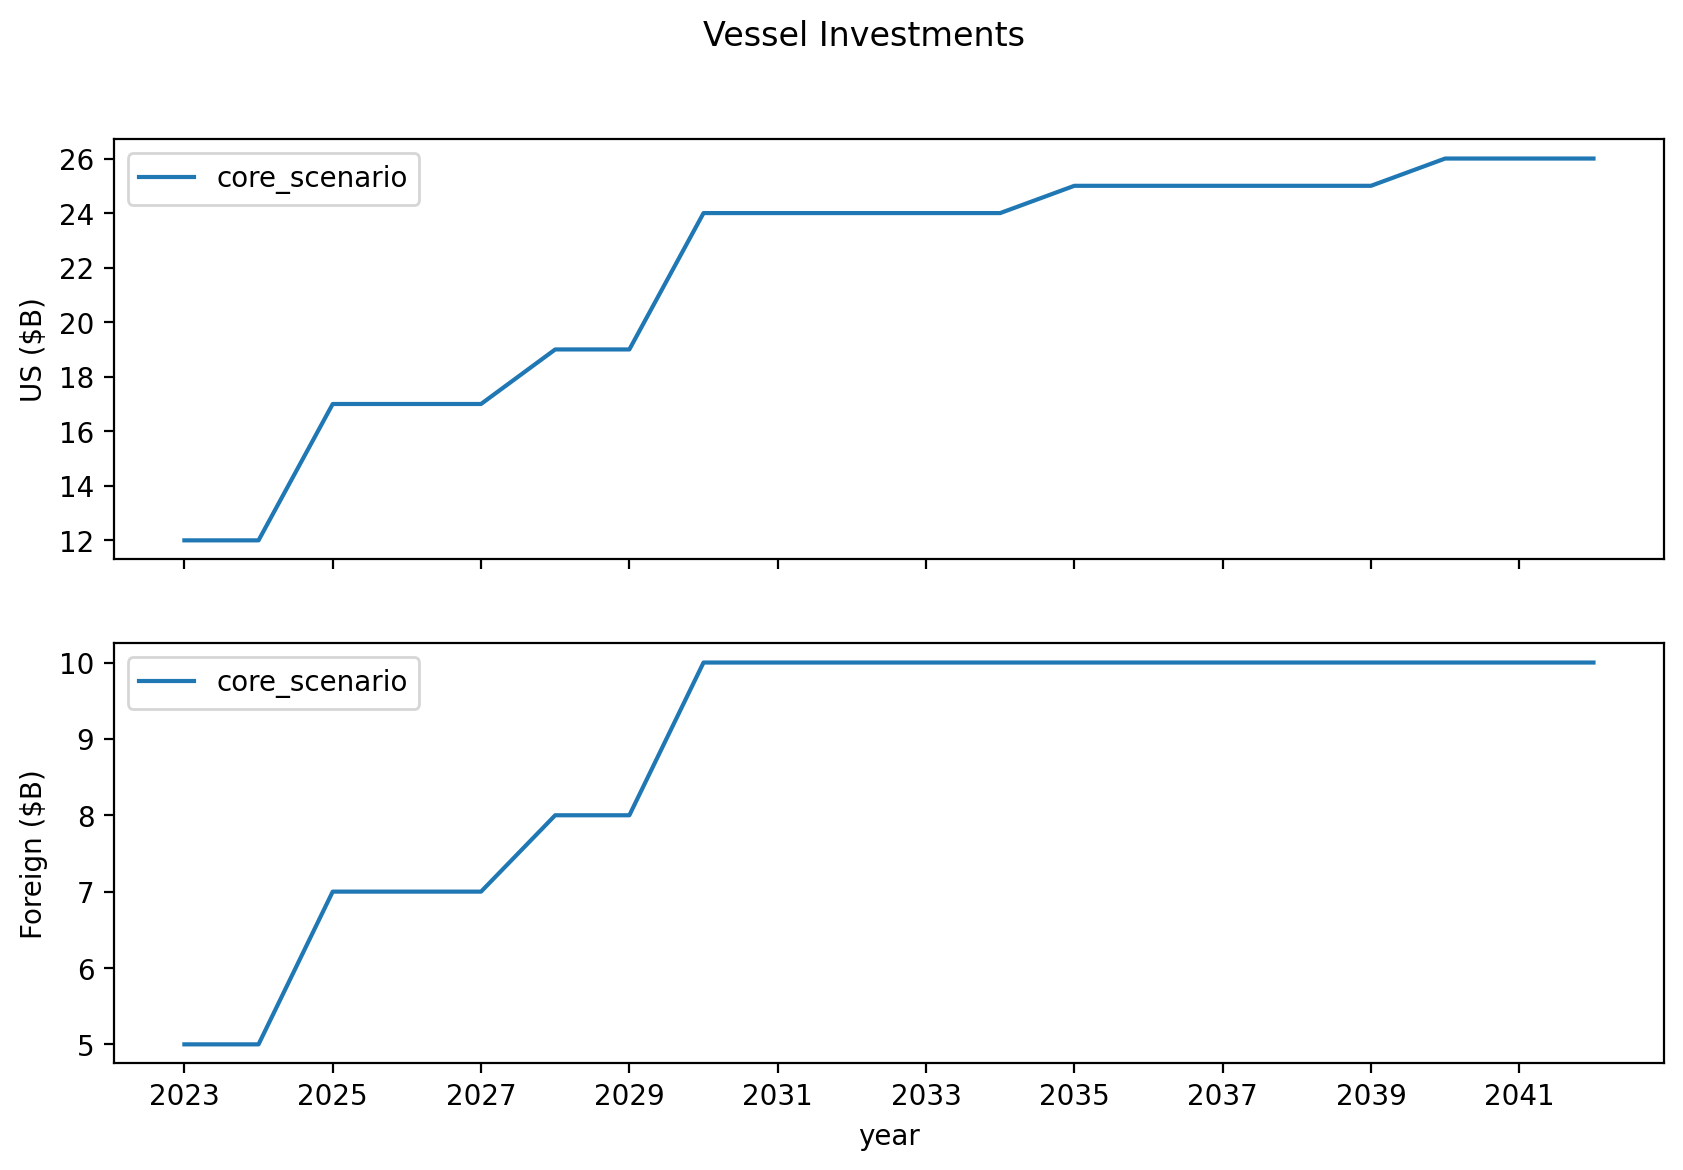

In [47]:
vessel_investment_plot(all_alloc, all_future, scenarios, vessel_types, vessel_costs)

# Installed Capacity CSV

In [19]:
yrs = np.arange(2023,2043,1)
installed_cap = pd.DataFrame(columns=scenarios, data = np.zeros((len(yrs), len(scenarios))), index = yrs)
display(installed_cap)


,best_path_forward
2023,0.0
2024,0.0
2025,0.0
2026,0.0
2027,0.0
2028,0.0
2029,0.0
2030,0.0
2031,0.0
2032,0.0


In [20]:
for df in dfs:
        df['finished'] = df['Date Finished'].dt.year
        df_finished = df.groupby(['finished']).capacity.sum().reset_index()
        display(df_finished)

        mapping = dict(df_finished[['finished','capacity']].values)
        installed_cap['best_path_forward'] = installed_cap.index.map(mapping)
        display(installed_cap)

,finished,capacity
0,2023,932
1,2024,704
2,2026,248
3,2027,2326
4,2028,3540
5,2029,1524
6,2030,2239
7,2031,4860
8,2032,4834
9,2033,5049


,best_path_forward
2023,932.0
2024,704.0
2025,NaN
2026,248.0
2027,2326.0
2028,3540.0
2029,1524.0
2030,2239.0
2031,4860.0
2032,4834.0


# Throughput Plot

In [21]:
df = dfs[0]

port,new_bedford,new_london,njwp,portsmouth,salem,sbmt,searsport,tradepoint
year,,,,,,,,
2023,800.000000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024,0.000000,704.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2026,0.000000,0.000000,998.460145,1129.491627,0.000000,0.000000,0.000000,248.000000
2027,0.000000,0.000000,511.539855,1129.491627,0.000000,816.000000,0.000000,738.212500
2028,0.000000,770.350797,0.000000,328.016746,0.000000,0.000000,144.000000,70.787500
2029,649.247788,153.649203,0.000000,870.449309,0.000000,0.000000,0.000000,600.000000
2030,675.964334,0.000000,766.557121,164.550691,748.717949,1867.814141,0.000000,0.000000
2031,632.034632,0.000000,2196.272641,0.000000,786.159244,1376.852926,0.000000,0.000000
2032,46.753247,797.227723,1789.640827,444.533040,497.122807,1328.906353,0.000000,299.201970


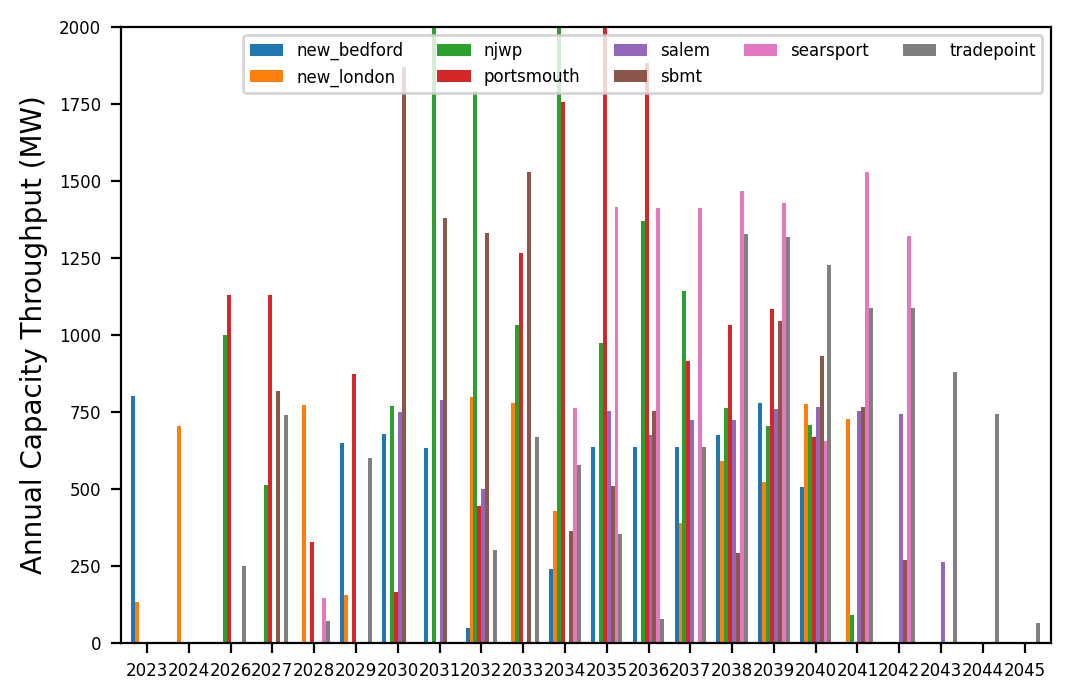

In [22]:
res = []

for _, project in df.iterrows():

    if project["Date Finished"].year == project["Date Started"].year:
        res.append((project["Date Finished"].year, project["port"], project["capacity"]))

    else:

        total = project["Date Finished"].date() - project["Date Started"].date()
        for year in np.arange(project["Date Started"].year, project["Date Finished"].year + 1):
            if year == project["Date Started"].year:
                perc = (dt.date(year + 1, 1, 1) - project["Date Started"].date()) / total

            elif year == project["Date Finished"].year:
                perc = (project["Date Finished"].date() - dt.date(year, 1, 1)) / total

            else:
                perc = (dt.date(year + 1, 1, 1) - dt.date(year, 1, 1)) / total

            res.append((year, project["port"], perc * project["capacity"]))

throughput = pd.DataFrame(res, columns=["year", "port", "capacity"]).pivot_table(
    index=["year"],
    columns=["port"],
    aggfunc="sum",
    fill_value=0.
)["capacity"]

display(throughput)

fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)

throughput.plot.bar(ax=ax, width=0.75)

ax.set_ylim(0, 2000)

ax.set_ylabel("Annual Capacity Throughput (MW)")
ax.set_xlabel("")

plt.xticks(rotation=0, fontsize=6)
plt.yticks(fontsize=6)

ax.legend(fontsize=6, ncol=5)
# fname_t = 'east_coast_analysis/figures/sc_roadmap_gaps/throughput_'+fig_name+'.png'
# fig.savefig(fname_t, dpi=300)

<AxesSubplot:>

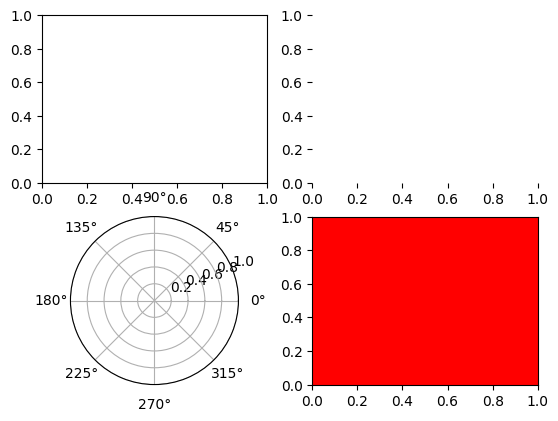

In [35]:
plt.subplot(221)

# equivalent but more general
ax1 = plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2 = plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')

# delete ax2 from the figure
# plt.delaxes(ax2)

# # add ax2 to the figure again
# plt.subplot(ax2)

# make the first Axes "current" again
plt.subplot(221)